In [1]:
import pandas as pd

match_id = '117093'
pitch_plane_df = pd.read_csv(f'/home/atom/SoccerTrack-v2/data/interim/pitch_plane_coordinates/{match_id}/{match_id}_pitch_plane_coordinates.csv')

pitch_plane_df.head()

,frame,match_time,event_period,ball_status,id,x,y,teamId
0,251,0.0,FIRST_HALF,BALLOUT,170959,0.28,0.18,9701.0
1,251,0.0,FIRST_HALF,BALLOUT,170960,0.28,0.53,9701.0
2,251,0.0,FIRST_HALF,BALLOUT,170961,0.05,0.48,9701.0
3,251,0.0,FIRST_HALF,BALLOUT,172186,0.50,0.61,9701.0
4,251,0.0,FIRST_HALF,BALLOUT,176476,0.67,0.48,9834.0


In [2]:
pitch_plane_first_frame = pitch_plane_df[(pitch_plane_df['frame'] == 251) & (pitch_plane_df['event_period'] == 'FIRST_HALF')].copy()
pitch_length = 105
pitch_width = 68
pitch_plane_first_frame.loc[:, 'x'] *= pitch_length
pitch_plane_first_frame.loc[:, 'y'] *= pitch_width

points = pitch_plane_first_frame[['x', 'y']].values
points.shape

(23, 2)

In [3]:
import numpy as np

H = np.load(f'/home/atom/SoccerTrack-v2/data/interim/homography/{match_id}/{match_id}_homography.npy')

In [4]:
import cv2

frame = cv2.imread(f'/home/atom/SoccerTrack-v2/data/interim/calibrated_videos/{match_id}/{match_id}_panorama.jpg')

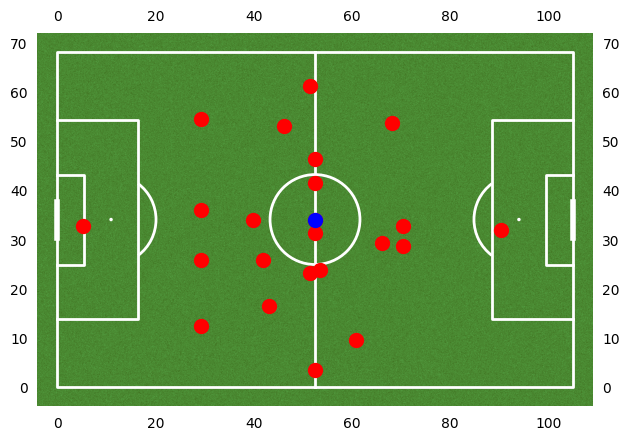

In [5]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt


pitch = Pitch(pitch_type='custom', pitch_color='grass', line_color='white', label=True, pitch_width=pitch_width, pitch_length=pitch_length)

fig, ax = pitch.draw()

for x, y in points:
    pitch.scatter(x, y, ax=ax, color='red', s=100)

pitch.scatter(0.5*pitch_length, 0.5*pitch_width, ax=ax, color='blue', s=100)

plt.show()


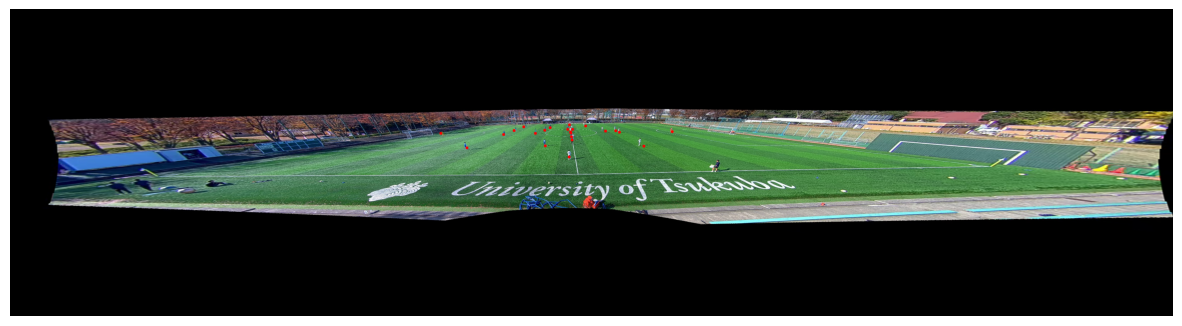

In [6]:
# ... existing code ...

# Reshape points for perspectiveTransform
points_reshaped = points.reshape(-1, 1, 2).astype(np.float32)

# Project the points onto the image using homography
projected_points = cv2.perspectiveTransform(points_reshaped, H)

# Create a copy of the frame to draw on
frame_with_points = frame.copy()

# Draw points on the image
for point in projected_points:
    x, y = point[0]
    cv2.circle(frame_with_points, (int(x), int(y)), 5, (0, 0, 255), -1)

# Save the image
cv2.imwrite('test.png', frame_with_points)

# Read the saved image
saved_image = cv2.imread('test.png')

# Display the image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
import pandas as pd
from preprocessing import Event_data

event_path = f'/home/atom/SoccerTrack-v2/data/raw/{match_id}/{match_id}_player_nodes.csv'
tracking_path = f'/home/atom/SoccerTrack-v2/data/raw/{match_id}/{match_id}_tracker_box_data.xml'
meta_path = f'/home/atom/SoccerTrack-v2/data/raw/{match_id}/{match_id}_tracker_box_metadata.xml'

# Load and process soccer data
soccertrack_df = Event_data('soccertrack',event_path,
                                  st_track_path = tracking_path,
                                  st_meta_path = meta_path).load_data()
print(soccertrack_df.head())


Loading data from soccertrack
Loaded data from soccertrack
          id  match_id  match_full_time  extra_full_time  player_id  \
0  114650995    117093          5400000                0   467351.0   
1  114650996    117093          5400000                0   467367.0   
2  114650997    117093          5400000                0        NaN   
3  114649223    117093          5400000                0   306233.0   
4  114649224    117093          5400000                0   170960.0   

   back_number player_name player_last_name  team_id team_name  ...  \
0         11.0          雄大               山田     9834  筑波大学 - B  ...   
1          8.0          亨輔               木元     9834  筑波大学 - B  ...   
2          NaN         NaN              NaN     9834  筑波大学 - B  ...   
3         21.0           遼               鈴木     9701      筑波大学  ...   
4         15.0          魁斗               林田     9701      筑波大学  ...   

   away_x_24 away_y_24  away_speed_24 away_name_24 away_nameEn_24  \
0        NaN      